#### Imports 

In [24]:
# import libraries
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
%matplotlib inline

In [7]:
df = pd.read_csv('covid_19_data.csv')


#### Data Cleaning 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              7926 non-null   int64  
 1   ObservationDate  7926 non-null   object 
 2   Province/State   4493 non-null   object 
 3   Country/Region   7926 non-null   object 
 4   Last Update      7926 non-null   object 
 5   Confirmed        7926 non-null   float64
 6   Deaths           7926 non-null   float64
 7   Recovered        7926 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 495.5+ KB


In [10]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3433
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [ ]:
df['Province/State'].unique()

In [13]:
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])

In [14]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,2020-03-22,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,2020-03-22,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,2020-03-22,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,2020-03-22,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [16]:
bydate=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bydate.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [18]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(df["Country/Region"].unique()))
print("Total number of Confirmed Cases: ",bydate["Confirmed"].iloc[-1])
print("Total number of Recovered Cases: ",bydate["Recovered"].iloc[-1])
print("Total number of Deaths Cases: ",bydate["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(bydate["Confirmed"].iloc[-1]-bydate["Recovered"].iloc[-1]))

Basic Information
Totol number of countries with Disease Spread:  200
Total number of Confirmed Cases:  335957.0
Total number of Recovered Cases:  97882.0
Total number of Deaths Cases:  14634.0
Total number of Active Cases around the World:  238075.0


#### EDA

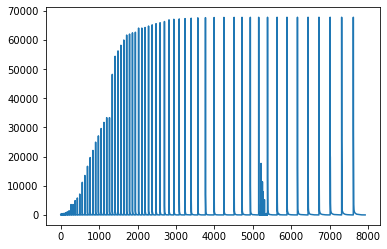

In [15]:
df.Confirmed.plot()

In [22]:
bydate

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-03-18,214915.0,83313.0,8733.0
2020-03-19,242713.0,84962.0,9867.0
2020-03-20,272167.0,87403.0,11299.0


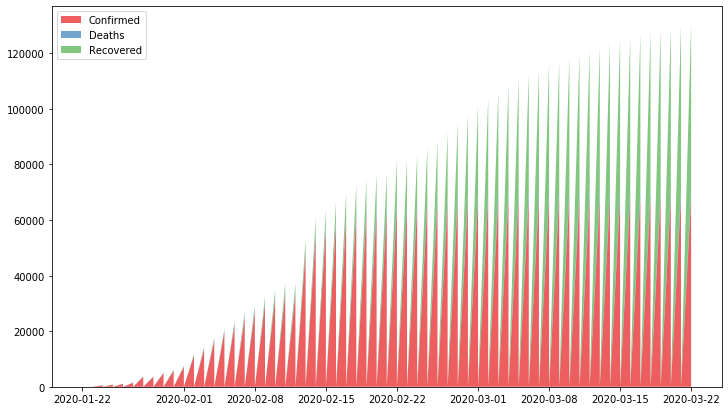

In [34]:
x= df["ObservationDate"].values
y=[df.Confirmed.values, df.Deaths.values, df.Recovered.values]
 
# Plot
pal = sns.color_palette("Set1")
plt.figure(figsize=[12.0, 7.0])
plt.stackplot(x,y, labels=['Confirmed','Deaths','Recovered'], colors=pal, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

#### Models

#### Final Model